In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_fill), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_fill[:5000], y_train_fill[5000:]

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.8958 - accuracy: 0.7151 - val_loss: 0.5029 - val_accuracy: 0.8318
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4902 - accuracy: 0.8295 - val_loss: 0.4278 - val_accuracy: 0.8570
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4381 - accuracy: 0.8456 - val_loss: 0.4006 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4071 - accuracy: 0.8558 - val_loss: 0.3987 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3881 - accuracy: 0.8624 - val_loss: 0.3743 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8638 - val_loss: 0.3688 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3576 - accuracy: 0.8725 - val_loss: 0.3607 - val_accuracy:

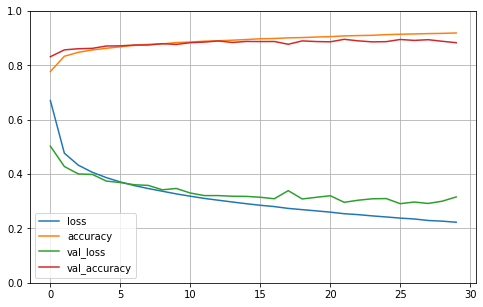

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 951us/step - loss: 67.7394 - accuracy: 0.8448


[67.73941802978516, 0.8447999954223633]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_pred = model.predict_classes(X_new)

/Users/emaghakyan/projects/ml_book/e2e_ml_project/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
y_pred

array([9, 2, 1])

In [18]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [19]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)               

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9694 - accuracy: 0.6895 - val_loss: 0.5011 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4939 - accuracy: 0.8302 - val_loss: 0.4511 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4415 - accuracy: 0.8462 - val_loss: 0.4126 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8579 - val_loss: 0.4275 - val_accuracy: 0.8454
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3882 - accuracy: 0.8636 - val_loss: 0.3766 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3746 - accuracy: 0.8677 - val_loss: 0.3743 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3619 - accuracy: 0.8718 - val_loss: 0.3726 - val_accuracy:

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 905us/step - loss: 2.5531 - accuracy: 0.8399


[2.5530591011047363, 0.839900016784668]

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax", kernel_initializer="he_normal"),
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7278 - accuracy: 0.7458 - val_loss: 0.4557 - val_accuracy: 0.8410
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4453 - accuracy: 0.8416 - val_loss: 0.4339 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4169 - accuracy: 0.8492 - val_loss: 0.3826 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8640 - val_loss: 0.3720 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3719 - accuracy: 0.8659 - val_loss: 0.3635 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8724 - val_loss: 0.3824 - val_accuracy: 0.8608
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3475 - accuracy: 0.8745 - val_loss: 0.3631 - val_accuracy:

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 935us/step - loss: 95.5495 - accuracy: 0.5796


[95.54946899414062, 0.5795999765396118]